***THE SPARKS FOUNDATION***

Data Science and Business Analytics Internship(GRIP May2021)

**TASK 2**:PREDICTION USING UNSUPERVISED ML

Problem:Predict the Optimum number of clusters and Represent it visually.

By:SOWMYA MOHAN

Here we will use K-Means Clustering Technique to decide the optimum number of clusters for the given dataset.

IMPORT THE REQUIRED LIRARIES

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

READING DATA FILE

In [ ]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data,columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


CHECK IF THERE IS ANY MISSING VALUES

In [ ]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

We can see that there are no missing values.

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


EXTRACT COLUMN VALUES

In [ ]:
x = iris_df.iloc[:,[0,1,2,3]].values
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

TARGET VARIABLES

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Here 0 - Setosa, 1 - Versicolour, 2 - Virginica

**TO FIND OPTIMUM NUMER OF CLUSTERS USING ELBOW METHOD**

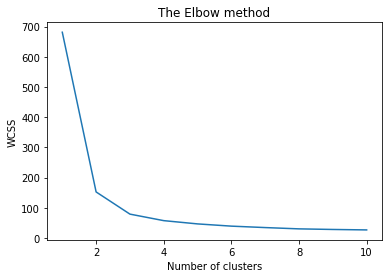

In [ ]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
     
plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

*From above graph we can say that there will be 3 optimum numbers of clusters.*

**K-MEANS CLUSTERING**

APPLYING K-MEANS TO THE IRIS DATASET

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 200, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

VISUALIZE THE RESULTS

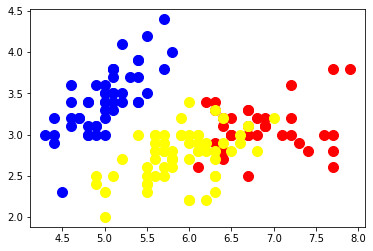

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s=100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s=100, c='blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s = 100, c = 'yellow', label = 'Iris-Verginica')

PLOTTING THE CENTROIDS OF THE 3 CLUSTERS

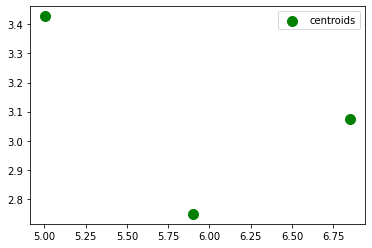

In [ ]:
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'green', label = 'centroids')
plt.legend()

VISUALIZE THE 2 PLOTS TOGETHER

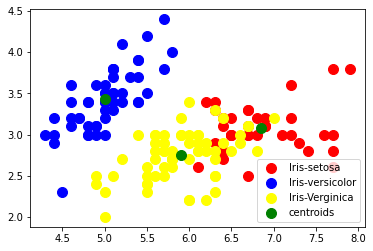

In [ ]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
           s=100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
           s=100, c='blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2,1],
           s = 100, c = 'yellow', label = 'Iris-Verginica')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           s = 100, c = 'green', label = 'centroids')
plt.legend()

SO WE CAN CONCLUDE THAT **THE OPTIMUM NUMBER OF CLUSTERS IS 3**.

END OF TASK-2

***THANK YOU!!!***